# Evaluating the A/B test with the Bayesian approach

## **Frequentist vs. Bayesian Approaches**  

The **Frequentist** and **Bayesian** approaches are two fundamentally different ways of interpreting probability and making statistical inferences.  



## **How They Define Probability**  
🔵 **Frequentist:** Probability is the **long-run frequency** of an event occurring in repeated experiments.  
🟠 **Bayesian:** Probability represents a **degree of belief** based on prior knowledge and observed data.  

💡 **Example:**  
- A frequentist would say, "If we flip a fair coin an infinite number of times, it will land on heads **50% of the time**."  
- A Bayesian would say, "Before flipping the coin, I assume a 50% chance of heads. If I observe more heads than tails, I may update my belief that the coin is biased."



## **Key Differences**  

| Aspect            | Frequentist Approach | Bayesian Approach |
|------------------|--------------------|------------------|
| **Definition of Probability** | Relative frequency in repeated trials | Degree of belief, updated with new data |
| **Prior Knowledge** | Not used | Used to update beliefs (Bayes' Theorem) |
| **Inference Method** | Uses sampling distributions | Uses prior + observed data to compute posterior |
| **Results Interpretation** | Probability of data given a hypothesis | Probability of hypothesis given the data |
| **Commonly Used Tests** | Z-test, t-test, Chi-square | Bayesian inference, credible intervals |
| **Confidence vs. Credibility** | Confidence intervals (frequentist) | Credible intervals (Bayesian) |



## **Example: A/B Testing**
Let's say we are testing whether **new button B** converts better than **old button A** on a website.

### **Frequentist Approach**
1. Set up a **null hypothesis**: “B is not better than A.”  
2. Collect **conversion data** for A and B.  
3. Perform a **statistical test (e.g., z-test, chi-square test)** to check if the difference is **statistically significant**.  
4. If the **p-value < 0.05**, reject the null hypothesis and conclude that B is better.  

📌 **Problem:** The frequentist approach only tells us **whether the observed data is unlikely given the assumption that A and B are equal**, but it doesn’t tell us the actual probability of B being better than A.



### **Bayesian Approach**
1. Start with a **prior belief** about conversion rates (e.g., assume A and B have the same rate).  
2. Collect **conversion data** for A and B.  
3. Use **Bayes’ Theorem** to update the prior belief, creating a **posterior distribution** for each group.  
4. Compute the probability that **B is better than A** (e.g., "B has an 85% chance of being better").  

📌 **Advantage:** Instead of just rejecting or failing to reject a hypothesis, the Bayesian approach gives a **direct probability statement** about the likelihood that B is better than A.



## **Key Takeaways**  
✅ **Frequentist approach** is based on **long-run frequencies** and is widely used in traditional statistics.  
✅ **Bayesian approach** incorporates **prior knowledge** and **updates beliefs** as more data becomes available.  
✅ **Frequentist results** are often harder to interpret ("p-value < 0.05"), while **Bayesian results** provide intuitive probability estimates ("B is better than A with 85% confidence").  
✅ **Bayesian methods are useful when data is limited** or when you want to update beliefs over time.  





Frequentist and Bayesian approaches have developed completely separately from each other. The Bayesian approach is named after Thomas Bayes, an 18th-century statistician and minister who formulated Bayes' theorem. However, it was Pierre-Simon Laplace who further developed and applied Bayesian methods. The Frequentist approach emerged in the early 20th century, largely influenced by statisticians like Ronald Fisher, Jerzy Neyman, and Egon Pearson. 

Early Debates: The debate between Bayesian and Frequentist approaches has been ongoing since their inceptions. Early statisticians like Fisher and Neyman had differing views on the role of probability and inference.

Modern Usage: Today, both approaches are used in various fields, often complementing each other. Bayesian methods have gained popularity with the advent of computational tools that make complex Bayesian analyses feasible.

Applications: Frequentist methods are commonly used in fields like clinical trials and quality control, while Bayesian methods are popular in fields like machine learning, economics, and certain areas of scientific research.

In the 20th century frequentist statistics was more commonly used because the people who developed it were very influential and because Bayesian approach requires processing power that wasn't available before the advent of modern computers. The last decades have seen a resurgence of Bayesian methods.

Before we dive into the analysis let's review the key concepts of Bayesian analysis.

## Key concepts of Bayesian approach

### Beta distribution

We need to discuss an important distribution that will be commonly used for evaluating A/B tests using Bayesian approach - the beta distribution. The beta distribution is a continuous probability distribution defined on the interval [0, 1]. It is commonly used in Bayesian statistics, particularly as a conjugate prior for the binomial, Bernoulli, and geometric distributions. The beta distribution is characterized by two shape parameters, typically denoted as α and β. Let's generate a bunch of beta distributions to see how they look like.

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import beta, norm
import matplotlib.pyplot as plt
import seaborn as sns

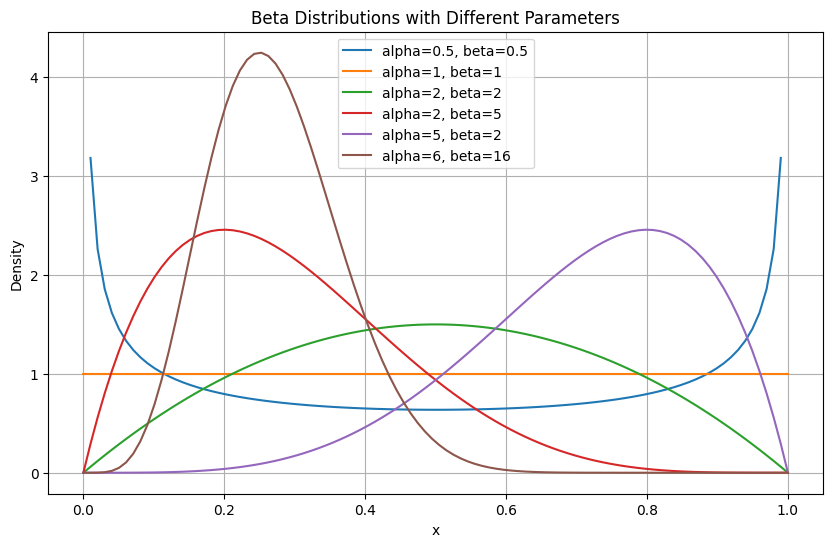

In [11]:
from scipy.stats import beta

# Define a range of x values
x = np.linspace(0, 1, 100)

# Define different alpha and beta parameters for the distributions
params = [(0.5, 0.5), (1, 1), (2, 2), (2, 5), (5, 2),(6,16)]

# Plot the beta distributions
plt.figure(figsize=(10, 6))
for alpha, beta_param in params:
    y = beta.pdf(x, alpha, beta_param)
    plt.plot(x, y, label=f'alpha={alpha}, beta={beta_param}')

# Add titles and labels
plt.title('Beta Distributions with Different Parameters')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Beta distribution is perfect for modelling probability of conversion - it ranges from 0 to 1 and depending on the alpha and beta parameters can assume any shape.
On top of that, beta distribution is a [Conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior) for the binomial distribution. This simply means that if the prior was a binomial distribution, the posterior will be too. This makes computations more efficient and easier to interpret. 

### **Prior, Posterior, and Bayes' Rule**  

In Bayesian inference, we update our beliefs as we observe new data. This update process follows **Bayes’ Rule**, which connects the **prior** and **posterior** probabilities.  



## **The Three Key Concepts**  

### **🔹 Prior (Initial Belief)**
- Represents our **belief** about a parameter **before** seeing the data.  
- It is based on **past knowledge, intuition, or historical data**.  
- Example: If we don’t know much about a website’s conversion rate, we might assume it’s equally likely to be anywhere between 0% and 100% (a **Beta(1,1) prior**).  



### **🔹 Likelihood (New Evidence)**
- Represents the **probability of observing the data**, given a specific hypothesis.  
- It comes from the **data we collect** in an experiment or test.  
- Example: If we run an A/B test and observe **5 conversions out of 20 users**, this data contributes to updating our belief.  



### **🔹 Posterior (Updated Belief)**
- The **posterior distribution** is our **updated belief** after seeing the data.  
- It combines both the **prior** and the **likelihood** using Bayes' Rule.  
- Example: After observing 5 conversions in 20 trials, our belief about the true conversion rate shifts (e.g., from a flat **Beta(1,1)** prior to a more concentrated **Beta(6,16)** posterior).  



## **Bayes’ Rule: Connecting Prior and Posterior**  
Bayes’ Rule mathematically updates our beliefs:

$$
P(\theta | \text{Data}) = \frac{P(\text{Data} | \theta) \cdot P(\theta)}{P(\text{Data})}
$$

Where:  
$$  P(\theta) =  Prior belief (\text{Before seeing data}) $$
$$  P(\text{Data} | \theta) = Likelihood (\text{How well the data fits a particular hypothesis}) $$
$$  P(\text{Data}) = Evidence (\text{The total probability of the data across all possible hypotheses}) $$
$$  P(\theta | \text{Data}) = Posterior belief (\text{Updated probability after seeing data})  $$



## **Intuitive Example: A/B Testing**  
Imagine you are running an **A/B test** on a website. You want to know whether **Button B** converts better than **Button A**.

1. **Prior**: Before running the test, you assume both buttons have an equal chance of performing well (e.g., a **Beta(1,1)** distribution).  
2. **Likelihood**: You run the test and see **20 users for each button**, with **Button A getting 5 conversions** and **Button B getting 8 conversions**.  
3. **Posterior**: Using Bayes' Rule, you update your belief about the conversion rates. If Button B has a higher posterior probability, you can be more confident in its effectiveness.  



## **Why This Matters**  
✅ **Bayesian inference provides a full distribution** rather than just a single point estimate.  
✅ **You can incorporate prior knowledge** (e.g., historical data) to make better decisions.  
✅ **Your beliefs update dynamically** as new data arrives, rather than being fixed in a frequentist framework.  







## Bayesian evaluation

In [12]:
summary_df = pd.read_csv('data_summary.csv',index_col= 'variation_ga')

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta, norm

def evaluate_ab_test_with_bayesian_plots(conversions_a, trials_a, conversions_b, trials_b, title_binary='Density Plot of Binary Outcomes', title_conversion='Density Plot of Conversion Rates'):
    # Define priors (using Beta distribution)
    alpha_prior, beta_prior = 1, 1  # Uniform prior

    # Update priors with observed data to get posteriors
    alpha_posterior_a = alpha_prior + conversions_a
    beta_posterior_a = beta_prior + trials_a - conversions_a

    alpha_posterior_b = alpha_prior + conversions_b
    beta_posterior_b = beta_prior + trials_b - conversions_b

    # Simulate posterior distributions
    np.random.seed(0)  # For reproducibility
    posterior_a = beta.rvs(alpha_posterior_a, beta_posterior_a, size=1000)
    posterior_b = beta.rvs(alpha_posterior_b, beta_posterior_b, size=1000)

    # Calculate the probability that conversion rate B is greater than A
    probability_b_greater_than_a = np.mean(posterior_b > posterior_a)

    # Plot density plots
    plt.figure(figsize=(12, 6))

    # Plot density plot of binary outcomes
    plt.subplot(1, 2, 1)
    sns.kdeplot(posterior_a, label='Control Group (A)', fill=True)
    sns.kdeplot(posterior_b, label='Treatment Group (B)', fill=True)
    plt.title(title_binary)
    plt.xlabel('Conversion Rate')
    plt.ylabel('Density')
    plt.legend()

    # Plot density plot of conversion rates
    plt.subplot(1, 2, 2)
    sns.kdeplot(posterior_a - posterior_b, label='Difference (B - A)', fill=True)
    plt.axvline(0, color='red', linestyle='--', label='No Difference')
    plt.title(title_conversion)
    plt.xlabel('Difference in Conversion Rates')
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return {
        'probability_b_greater_than_a': probability_b_greater_than_a,
        'posterior_a': posterior_a,
        'posterior_b': posterior_b
    }



## Comparing Frequentist and Bayesian evaluation
Let's repeat the evaluation of the A/B test with Bayesian approach and review which methodology produces results that are easier to understand

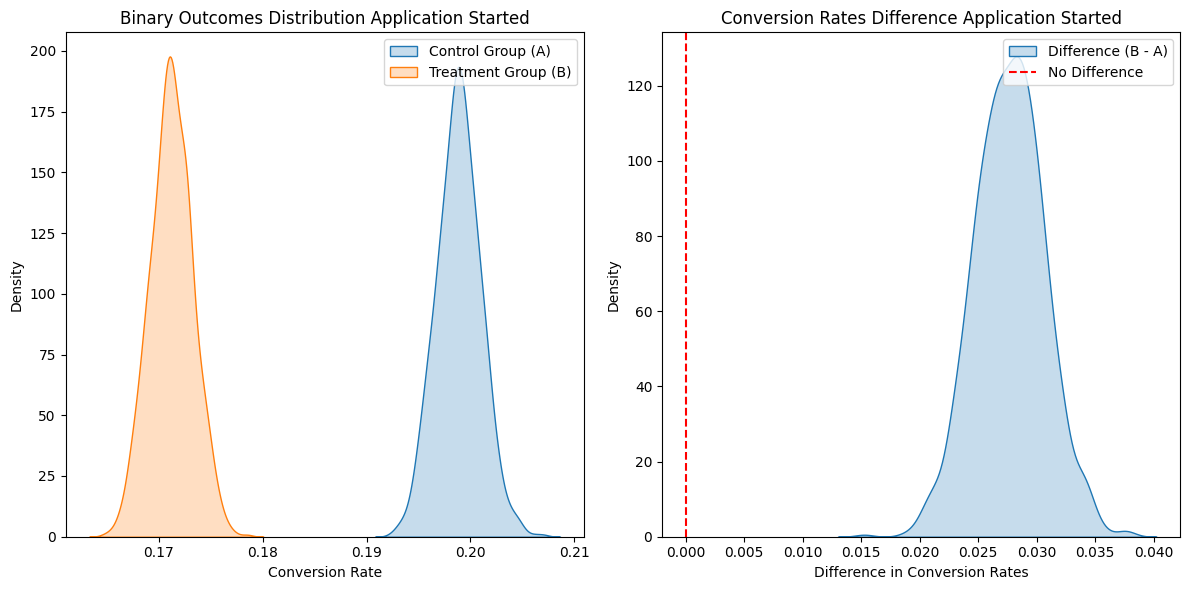

Probability that B is better than A: 0.0000


In [14]:
conversions_a = summary_df.iloc[0,3]  # Number of conversions for control
trials_a =  summary_df.iloc[0, 0]      # Total trials for variation control
conversions_b = summary_df.iloc[1,3]  # Number of conversions for variation test
trials_b =  summary_df.iloc[1, 0]      # Total trials for variation test

results = evaluate_ab_test_with_bayesian_plots(conversions_a, trials_a, conversions_b, trials_b, 
                                               title_binary='Binary Outcomes Distribution Application Started', 
                                               title_conversion='Conversion Rates Difference Application Started')
print(f"Probability that B is better than A: {results['probability_b_greater_than_a']:.4f}")

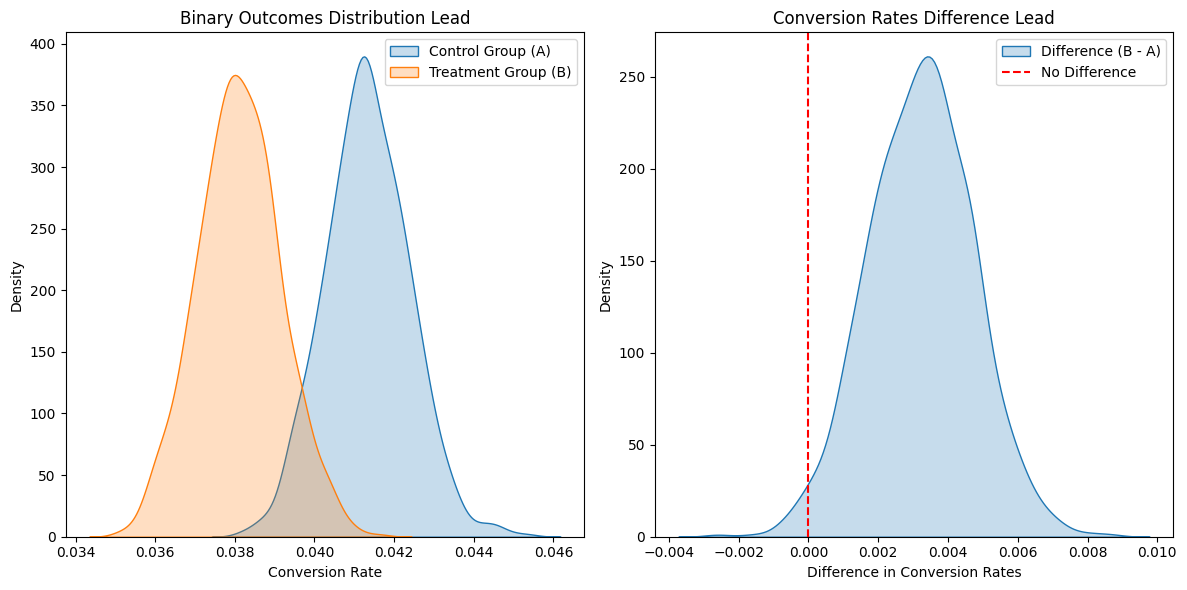

Probability that B is better than A: 0.0180


In [15]:
conversions_a = summary_df.iloc[0,5]  # Number of conversions for control
trials_a =  summary_df.iloc[0, 0]      # Total trials for variation control
conversions_b = summary_df.iloc[1,5]  # Number of conversions for variation test
trials_b =  summary_df.iloc[1, 0]      # Total trials for variation test

results = evaluate_ab_test_with_bayesian_plots(conversions_a, trials_a, conversions_b, trials_b, title_binary='Binary Outcomes Distribution Lead', title_conversion='Conversion Rates Difference Lead')
print(f"Probability that B is better than A: {results['probability_b_greater_than_a']:.4f}")

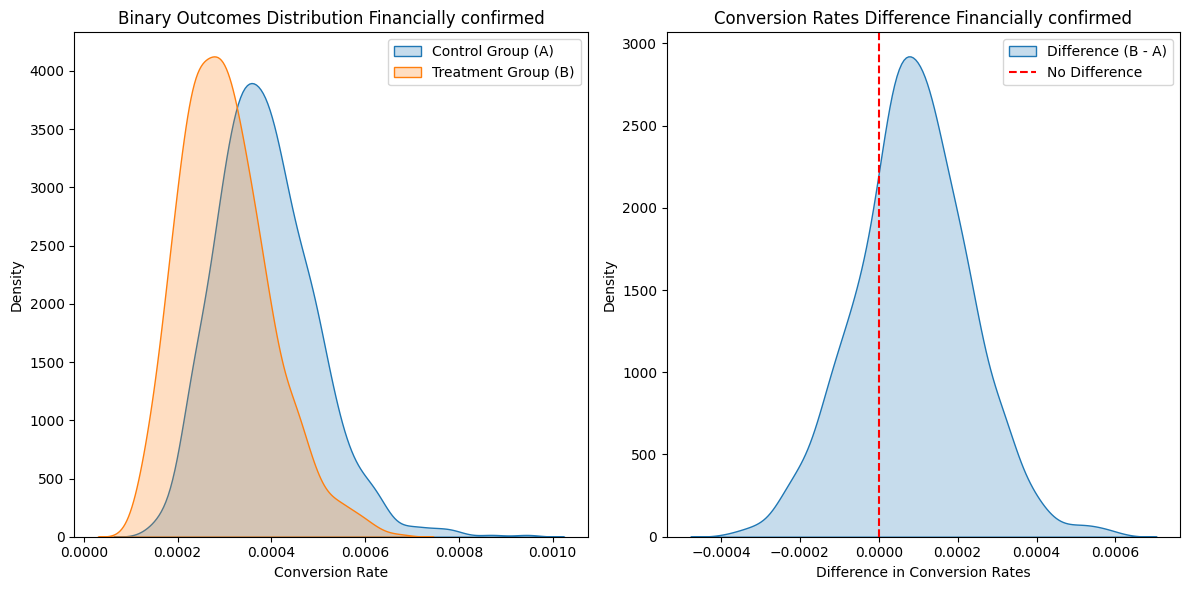

Probability that B is better than A: 0.2520


In [16]:
conversions_a = summary_df.iloc[0,8]  # Number of conversions for control
trials_a =  summary_df.iloc[0, 0]      # Total trials for variation control
conversions_b = summary_df.iloc[1,8]  # Number of conversions for variation test
trials_b =  summary_df.iloc[1, 0]      # Total trials for variation test

results = evaluate_ab_test_with_bayesian_plots(conversions_a, trials_a, conversions_b, trials_b, title_binary='Binary Outcomes Distribution Financially confirmed', title_conversion='Conversion Rates Difference Financially confirmed')
print(f"Probability that B is better than A: {results['probability_b_greater_than_a']:.4f}")

## Conclusion
Both Frequentist and Bayesian methodologoies can be used to evaluate the A/B test. Bayesian framework provides results that are much more intuitive and easier to interpret and communicate in a business setting. 